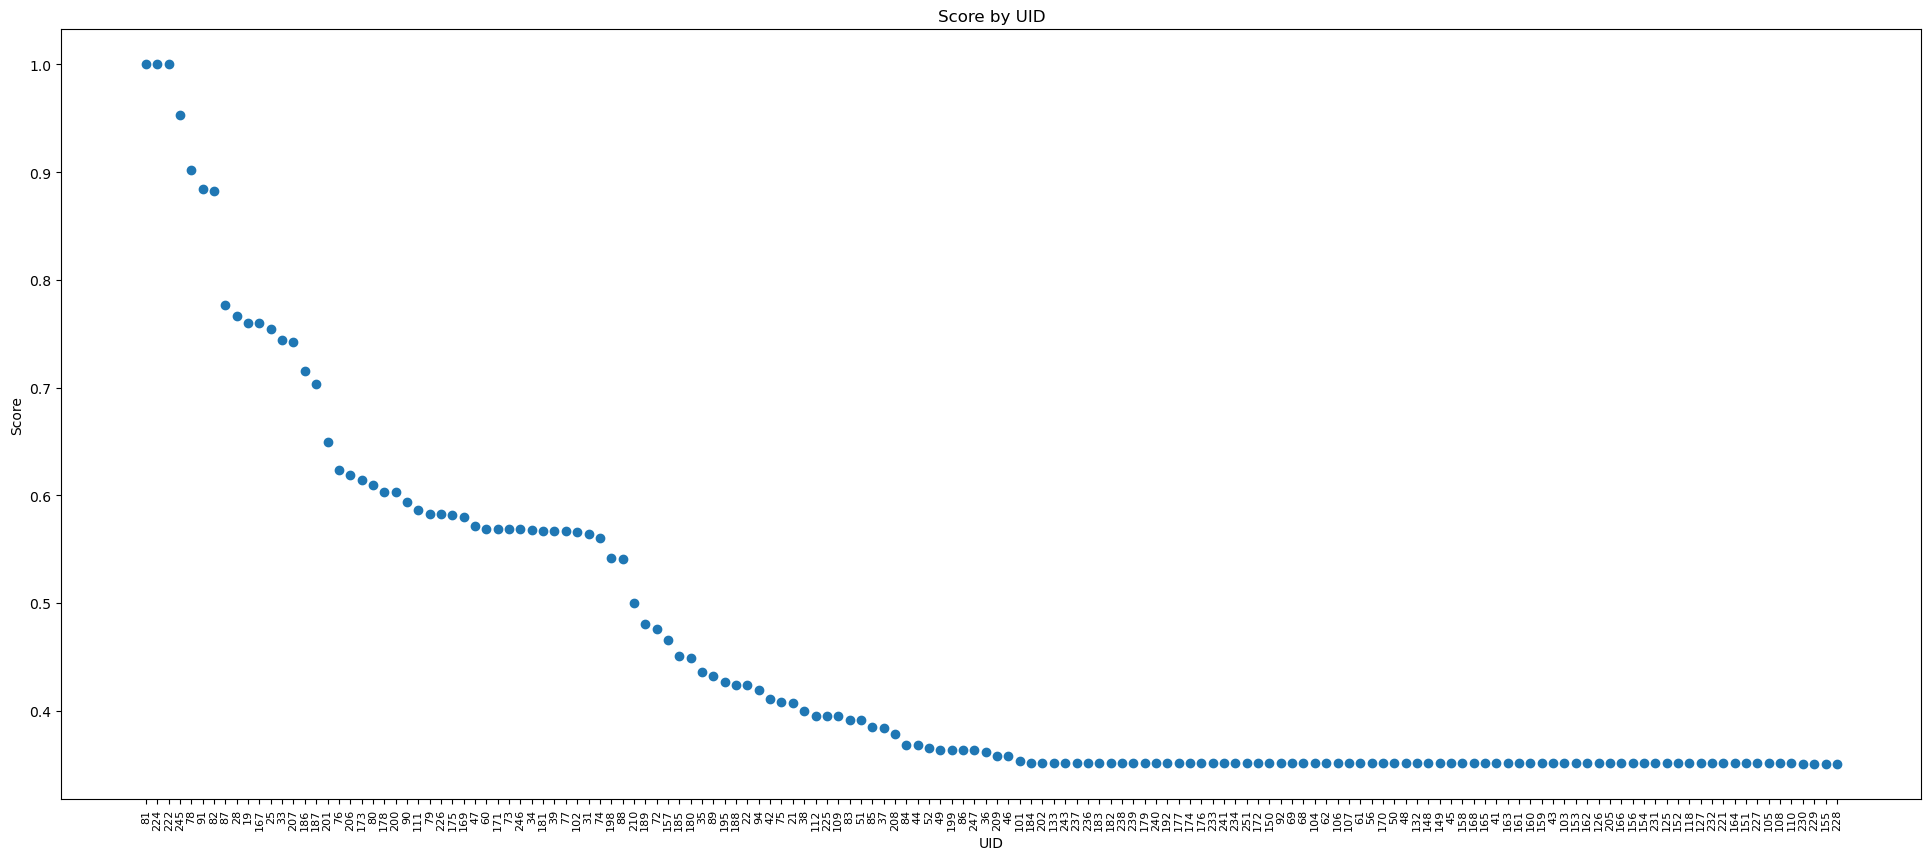

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import json

scores = json.load(open("scores.json"))

# Calculate the sum of volumes for each miner
scores_df = []
for i, data in enumerate(scores):
    if data > 0:
        scores_df.append({
            "score": data,
            "uid": str(i)
        })

# Convert to DataFrame for easier plotting
df = pd.DataFrame(scores_df)

# Sort the DataFrame by score in descending order
df = df.sort_values(by='score', ascending=False)

# Plot the scores as a scatter plot
plt.figure(figsize=(22, 8))
plt.scatter(df['uid'], df['score'])
plt.xlabel('UID')
plt.ylabel('Score')
plt.title('Score by UID')
plt.xticks(rotation=90, fontsize=8)  # Make x-axis labels smaller
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f017507a-86ad-40cb-8efa-5587c78ee158' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>